In [51]:
import torchvision
import torch 
import torch.nn as nn
import torch.nn.functional as F
import random

class SinusoidalDataset(torch.utils.data.Dataset):
    def __init__(self, bsize_outer, bsize_inner, minA=1, maxA=10, minP=3, maxP=4*3.14, minO=-2, maxO=2):
        super().__init__()
        self.bsize_outer = bsize_outer
        self.bsize_inner = bsize_inner
        self.minA, self.maxA = minA, maxA
        self.minP, self.maxP = minP, maxP
        self.minO, self.maxO = minO, maxO

    def __len__(self):
        return 1234

    def __getitem__(self, idx):
        amplitudes = torch.rand(self.bsize_outer)*(self.minA-self.maxA) - self.minA
        periods    = torch.rand(self.bsize_outer)*(self.minP-self.maxP) - self.minP
        offsets    = torch.rand(self.bsize_outer)*(self.minO-self.maxO) - self.minO
        x, y = [], []
        for a, p, o in zip(amplitudes, periods, offsets):
            tmpx, tmpy = Sinusoid(a, p, o).get_sample(self.bsize_inner) 
            x.append(tmpx)
            y.append(tmpy)
        return torch.cat(x, dim=0), torch.cat(y, dim=0)

In [52]:
class Sinusoid:
    def __init__(self, amplitude, period, offset):
        self.amplitude = amplitude
        self.period = period
        self.offset = offset
    def get_sample(self, k=1, noise=0, minx=-10, maxx=10):
        x = (torch.rand(1, k, 1)-minx)*(maxx-minx)
        y = self.amplitude*torch.sin(x/self.period*2*3.14 + self.offset)
        y += torch.randn_like(y)*noise
        return x, y

torch.Size([1, 100, 1]) torch.Size([1, 100, 1])
torch.Size([1, 500, 1]) torch.Size([1, 500, 1])


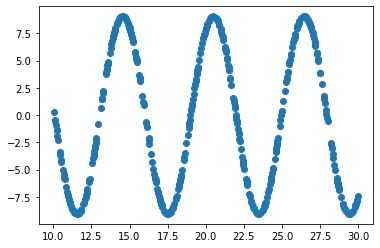

In [65]:
x, y = Sinusoid(2, 2*3.14, 2).get_sample(100)
print(x.shape, y.shape)
x, y = SinusoidalDataset(1, 500)[0]
print(x.shape, y.shape)
import matplotlib.pyplot as plt 
plt.scatter(x.numpy(), y.numpy())

In [68]:
sind = SinusoidalDataset(5, 4)
sind[0]

(tensor([[[23.3581],
          [27.4792],
          [22.3423],
          [11.3804]],
 
         [[27.6427],
          [22.2341],
          [20.6693],
          [25.5021]],
 
         [[28.7830],
          [29.7858],
          [27.5807],
          [12.7676]],
 
         [[17.0465],
          [12.7300],
          [23.3764],
          [23.9751]],
 
         [[11.1571],
          [15.0984],
          [23.5619],
          [29.6933]]]),
 tensor([[[ 0.0260],
          [-5.1726],
          [-5.7776],
          [-2.7288]],
 
         [[-3.4627],
          [ 7.6036],
          [ 7.6211],
          [-8.4508]],
 
         [[-2.4185],
          [-5.5146],
          [ 2.1750],
          [ 4.8993]],
 
         [[ 3.6906],
          [-0.1549],
          [ 0.6486],
          [-1.9728]],
 
         [[ 0.0467],
          [ 0.0771],
          [-0.0204],
          [ 0.0339]]]))